In [2]:
import numpy as np
import matplotlib.pyplot as plt
import grheat.point_source as point

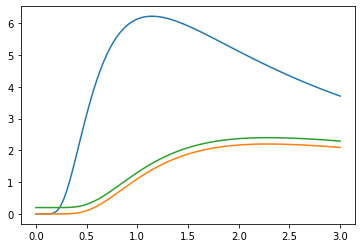

In [14]:
t = np.linspace(0,3,100)
tp = 0
T = point.instantaneous(0,0,0,t,0,0,1e-3,tp)
plt.plot(t,T)
T = point.instantaneous(0,1e-3,0,t,0,0,1e-3,tp)
plt.plot(t,T)
T = 0.2+point.instantaneous(1e-3,0,0,t,0,0,1e-3,tp)
plt.plot(t,T)

plt.show()

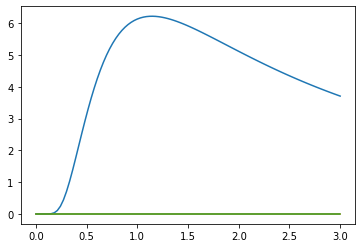

In [9]:
t = np.linspace(0,3,100)
tp = 0
T = point.instantaneous(0,0,0,t,0,0,1e-3,tp)
plt.plot(t,T)
T = point.continuous(0,0,0,t,0,0,1e-3)
plt.plot(t,T)
T = point.pulsed(0,0,0,t,0,0,1e-3,0.2)
plt.plot(t,T)


plt.show()